# 1. Data Prep and EDA (20 pts)

## FETCHING DATA FROM YAHOO FINANCE API

In [75]:
# we need to mount our drive since we are linking to a spreadsheet on our drive!
# copy and paste the code, then enter!
from google.colab import drive
drive.mount('/content/drive')

# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si


%matplotlib inline
from pylab import *
# helpful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Define the function to fetch the S&P 500 company list
def fetch_sp500_list():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)  # This parses all the tables in webpages to a list
    sp500_table = tables[0]  # The first table is typically the one containing the S&P 500 list
    return sp500_table[['Symbol', 'Security','GICS Sector']]  # Return a DataFrame with ticker symbols, company names, and sectors

# Fetch the S&P 500 company list
sp500_companies = fetch_sp500_list()

# Define the sectors of interest
sectors = ["Information Technology", "Energy", "Materials"]
for sector in sectors:
    sector_stocks = sp500_companies[sp500_companies['GICS Sector'] == sector]
    print(f"\nStocks in {sector} sector:")
    print(sector_stocks['Symbol'].tolist())



Stocks in Information Technology sector:
['ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SMCI', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC', 'ZBRA']

Stocks in Energy sector:
['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'EQT', 'XOM', 'HAL', 'HES', 'KMI', 'MRO', 'MPC', 'OXY', 'OKE', 'PSX', 'PXD', 'SLB', 'TRGP', 'VLO', 'WMB']

Stocks in Materials sector:
['APD', 'ALB', 'AMCR', 'AVY', 'BALL', 'CE', 'CF', 'CTVA', 'DOW', 'DD', 'EMN', 'ECL', 'FMC', 'FCX', 'IFF', 'IP', 'LIN', 'LYB', 'MLM', 'MOS', 'NEM', 'NUE', 'PKG', 'PPG', 'SHW', 'STLD', 'VMC', 'WRK']


### SECTOR WISE STOCKS

In [77]:
IT_sector=['ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SMCI', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC', 'ZBRA']

Energy_sector=['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'EQT', 'XOM', 'HAL', 'HES', 'KMI', 'MRO', 'MPC', 'OXY', 'OKE', 'PSX', 'PXD', 'SLB', 'TRGP', 'VLO', 'WMB']

Materials_sector=['APD', 'ALB', 'AMCR', 'AVY', 'BALL', 'CE', 'CF', 'CTVA', 'DOW', 'DD', 'EMN', 'ECL', 'FMC', 'FCX', 'IFF', 'IP', 'LIN', 'LYB', 'MLM', 'MOS', 'NEM', 'NUE', 'PKG', 'PPG', 'SHW', 'STLD', 'VMC', 'WRK']

In [78]:
# Filter the S&P 500 companies based on the specified sectors
ticker_symbols = list(sp500_companies[sp500_companies['GICS Sector'].isin(sectors)]['Symbol'])

dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in ticker_symbols}

# get the adjclose price for the NFLX (one sample)
closing_prices = pd.DataFrame(dow_prices['ACN']['adjclose']).rename(columns = {"adjclose":"ACN"})

# combine all the tickers (all the rest of the samples)
for i in ticker_symbols[1:]:
  closing_prices[i] = pd.DataFrame(dow_prices[i]['adjclose'])
closing_prices.reset_index(inplace= True)
closing_prices.rename(columns = {"index":"Date"}, inplace= True)

<ipython-input-78-2c96f44ab400>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closing_prices[i] = pd.DataFrame(dow_prices[i]['adjclose'])
<ipython-input-78-2c96f44ab400>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closing_prices[i] = pd.DataFrame(dow_prices[i]['adjclose'])
<ipython-input-78-2c96f44ab400>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea


## 2. MODELING



### Data Prep for Linear Regression Models

#### Fetching Data

In [79]:
Model_stock_data = closing_prices[(closing_prices['Date'] >= '2018-01-01') & (closing_prices['Date'] <= '2022-12-31')]


In [80]:
# Create a DataFrame for IT sector
IT_df = Model_stock_data[['Date'] + IT_sector].melt(id_vars=['Date'], var_name='Company', value_name='Price')

# Create a DataFrame for Energy sector
Energy_df = Model_stock_data[['Date'] + Energy_sector].melt(id_vars=['Date'], var_name='Company', value_name='Price')

# Create a DataFrame for Materials sector
Materials_df = Model_stock_data[['Date'] + Materials_sector].melt(id_vars=['Date'], var_name='Company', value_name='Price')

#### DATA PREPROCESSING

In [81]:
Materials_df.isnull().sum()

Date         0
Company      0
Price      654
dtype: int64

In [82]:
# Impute missing values in Materials_df with forward-fill
Materials_df = Materials_df.dropna()

#### SECTOR WISE c/p1, c/p2, c/p3, f/c CALCULATION

In [83]:
def calculate_yearly_ratios(df):
    # Filter the DataFrame by the last trading day of each year for each company
    df['Year'] = df['Date'].dt.year
    last_price_each_year = df.groupby(['Company', 'Year']).tail(1).set_index(['Company', 'Year'])['Price']

    # Create a DataFrame from the series with price pivoted by year
    prices_by_year = last_price_each_year.unstack(level=-1)

    # Calculate the required ratios
    if all(x in prices_by_year.columns for x in [2018, 2019, 2020, 2021, 2022]):
        prices_by_year['c/p1'] = prices_by_year[2021] / prices_by_year[2020]
        prices_by_year['c/p2'] = prices_by_year[2021] / prices_by_year[2019]
        prices_by_year['c/p3'] = prices_by_year[2021] / prices_by_year[2018]
        prices_by_year['f/c'] = prices_by_year[2022] / prices_by_year[2021]
    else:
        # Handle missing years by filling ratios with NaN
        prices_by_year['c/p1'] = float('nan')
        prices_by_year['c/p2'] = float('nan')
        prices_by_year['c/p3'] = float('nan')
        prices_by_year['f/c'] = float('nan')

    return prices_by_year[['c/p1', 'c/p2', 'c/p3', 'f/c']]

IT_ratios = calculate_yearly_ratios(IT_df).reset_index().rename_axis('index')
Energy_ratios = calculate_yearly_ratios(Energy_df).reset_index().rename_axis('index')
Materials_ratios = calculate_yearly_ratios(Materials_df).reset_index().rename_axis('index')


for i in [IT_ratios, Energy_ratios,Materials_ratios ]:
  print(i.isnull().sum())

Year
Company    0
c/p1       0
c/p2       0
c/p3       0
f/c        0
dtype: int64
Year
Company    0
c/p1       0
c/p2       0
c/p3       0
f/c        0
dtype: int64
Year
Company    0
c/p1       0
c/p2       0
c/p3       2
f/c        0
dtype: int64


In [84]:
Materials_ratios.dropna(inplace=True)

### MODEL FOR EACH SECTOR DATA

#### IT SECTOR

In [85]:

#Declaring the trainable parameters
Z = IT_ratios['f/c'].to_list()
W = IT_ratios['c/p3'].to_list()
X = IT_ratios['c/p2'].to_list()
Y = IT_ratios['c/p1'].to_list()
# declare the model
model = ConcreteModel()
n_points = len(X)
# declare decision variables
model.a = Var(domain=Reals,initialize = 1)
model.b = Var(domain=Reals, initialize = 1)
model.c = Var(domain = Reals, initialize = 1)
model.d = Var(domain = Reals, initialize = 1)
model.z = Var([i for i in range(n_points)],domain=Reals)
# Constraints
model.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  w = W[i]
  x = X[i]
  y = Y[i]
  model.constraints.add(model.z[i] == model.a + w*model.b + x*model.c + y*model.d )
# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += (model.z[i] - Z[i])**2
model.error = Objective(
                      expr = obj_expr,
                      sense = minimize)
# show the model you've created
model.pprint()
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.error())
print("A = ", model.a())
print("B = ", model.b())
print("C = ", model.c())
print("D = ", model.d())
a = model.a()
b = model.b()
c = model.c()
d = model.d()
IT_ratios["predictions_2022"] = a + IT_ratios['c/p2']*b + IT_ratios['c/p1']*c + IT_ratios['f/c']*d
# Sort the DataFrame by 'predictions_2022' in descending order
IT_ratios.sort_values('predictions_2022', ascending=True)
# Select the top 3 companies
IT_ratios.head(3)


5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=65, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : Fals

Year,Company,c/p1,c/p2,c/p3,f/c,predictions_2022
index,,,,,,
0,AAPL,1.346482,2.454727,4.638398,0.735958,0.845633
1,ACN,1.606654,2.025033,3.062126,0.652467,0.779393
2,ADBE,1.133848,1.719354,2.506453,0.593465,0.848645


#### Energy Sector

In [86]:

#Declaring the trainable parameters
Z = Energy_ratios['f/c'].to_list()
W = Energy_ratios['c/p3'].to_list()
X = Energy_ratios['c/p2'].to_list()
Y = Energy_ratios['c/p1'].to_list()
# declare the model
model = ConcreteModel()
n_points = len(X)
# declare decision variables
model.a = Var(domain=Reals,initialize = 1)
model.b = Var(domain=Reals, initialize = 1)
model.c = Var(domain = Reals, initialize = 1)
model.d = Var(domain = Reals, initialize = 1)
model.z = Var([i for i in range(n_points)],domain=Reals)
# Constraints
model.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  w = W[i]
  x = X[i]
  y = Y[i]
  model.constraints.add(model.z[i] == model.a + w*model.b + x*model.c + y*model.d )
# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += (model.z[i] - Z[i])**2
model.error = Objective(
                      expr = obj_expr,
                      sense = minimize)
# show the model you've created
model.pprint()
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.error())
print("A = ", model.a())
print("B = ", model.b())
print("C = ", model.c())
print("D = ", model.d())
a = model.a()
b = model.b()
c = model.c()
d = model.d()
Energy_ratios["predictions_2022"] = a + Energy_ratios['c/p2']*b + Energy_ratios['c/p1']*c + Energy_ratios['f/c']*d
# Sort the DataFrame by 'predictions_2022' in descending order
Energy_ratios.sort_values('predictions_2022', ascending=True)
# Select the top 3 companies
Energy_ratios.head(3)


5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=23, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None

Year,Company,c/p1,c/p2,c/p3,f/c,predictions_2022
index,,,,,,
0,APA,1.907595,1.073858,1.085889,1.764406,1.559313
1,BKR,1.190281,1.009957,1.242390,1.259632,1.582414
2,COP,1.866013,1.193582,1.272708,1.716918,1.525880


#### Materials Sector

In [87]:

#Declaring the trainable parameters
Z = Materials_ratios['f/c'].to_list()
W = Materials_ratios['c/p3'].to_list()
X = Materials_ratios['c/p2'].to_list()
Y = Materials_ratios['c/p1'].to_list()
# declare the model
model = ConcreteModel()
n_points = len(X)
# declare decision variables
model.a = Var(domain=Reals,initialize = 1)
model.b = Var(domain=Reals, initialize = 1)
model.c = Var(domain = Reals, initialize = 1)
model.d = Var(domain = Reals, initialize = 1)
model.z = Var([i for i in range(n_points)],domain=Reals)
# Constraints
model.constraints = ConstraintList()
# Predicted value
for i in range(n_points):
  w = W[i]
  x = X[i]
  y = Y[i]
  model.constraints.add(model.z[i] == model.a + w*model.b + x*model.c + y*model.d )
# declare objective
obj_expr = 0
for i in range(n_points):
  obj_expr += (model.z[i] - Z[i])**2
model.error = Objective(
                      expr = obj_expr,
                      sense = minimize)
# show the model you've created
model.pprint()
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.error())
print("A = ", model.a())
print("B = ", model.b())
print("C = ", model.c())
print("D = ", model.d())
a = model.a()
b = model.b()
c = model.c()
d = model.d()

Materials_ratios["predictions_2022"] = a + Materials_ratios['c/p2']*b + Materials_ratios['c/p1']*c + Materials_ratios['f/c']*d
# Sort the DataFrame by 'predictions_2022' in descending order
Materials_ratios.sort_values('predictions_2022', ascending=True)
# Select the top 3 companies
Materials_ratios.head(3)


5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=26, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  

Year,Company,c/p1,c/p2,c/p3,f/c,predictions_2022
index,,,,,,
0,ALB,1.597553,3.281136,3.173452,0.933721,0.623738
1,AMCR,1.061770,1.204249,1.482210,1.032021,0.840876
2,APD,1.137545,1.351579,2.027605,1.039143,0.832837


### MODEL RESULTS: TOP 3 COMPANIES FROM EACH SECTOR

In [88]:
print("IT companies: ",IT_ratios['Company'][:3].tolist())
print("Energy companies: ",Energy_ratios['Company'][:3].tolist())
print("Materials companies: ",Materials_ratios['Company'][:3].tolist())

IT companies:  ['AAPL', 'ACN', 'ADBE']
Energy companies:  ['APA', 'BKR', 'COP']
Materials companies:  ['ALB', 'AMCR', 'APD']


## EDA


### Data Prep

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

sector_company_map = {
    'Information Technology': ['AAPL', 'ACN', 'ADBE'],
    'Energy': ['APA', 'BKR', 'COP'],
    'Materials': ['ALB', 'AMCR', 'APD']
}

# Ensure the date column is in the correct datetime format
closing_prices['Date'] = pd.to_datetime(closing_prices['Date'])

# Filter data for the period from January 1, 2017 to December 31, 2021
viz_stock_data = closing_prices[(closing_prices['Date'] >= '2017-01-01') & (closing_prices['Date'] <= '2021-12-31')]




In [90]:
viz_stock_data=viz_stock_data.melt(id_vars=['Date'], var_name='Company', value_name='Price') # unpivoting the data using melt
viz_stock_data.dropna(inplace=True)

In [91]:
viz_stock_data.head()

,Date,Company,Price
0,2017-01-03,ACN,103.765625
1,2017-01-04,ACN,104.015129
2,2017-01-05,ACN,102.455887
3,2017-01-06,ACN,103.623093
4,2017-01-09,ACN,102.464790


### SECTOR WISE TIME SERIES VISUALIZATION

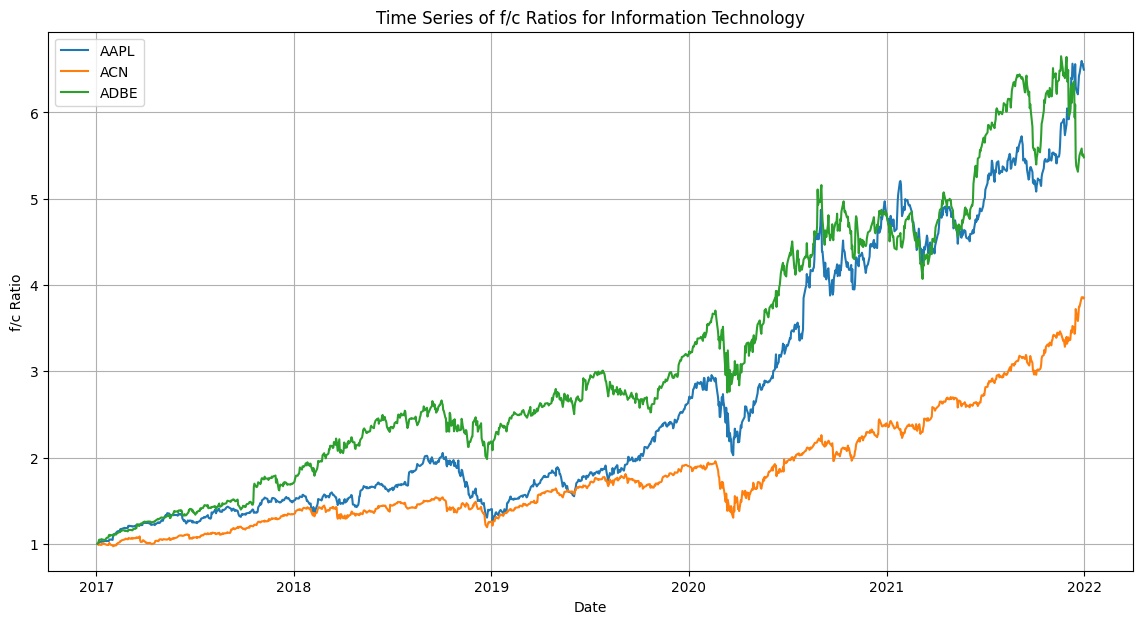

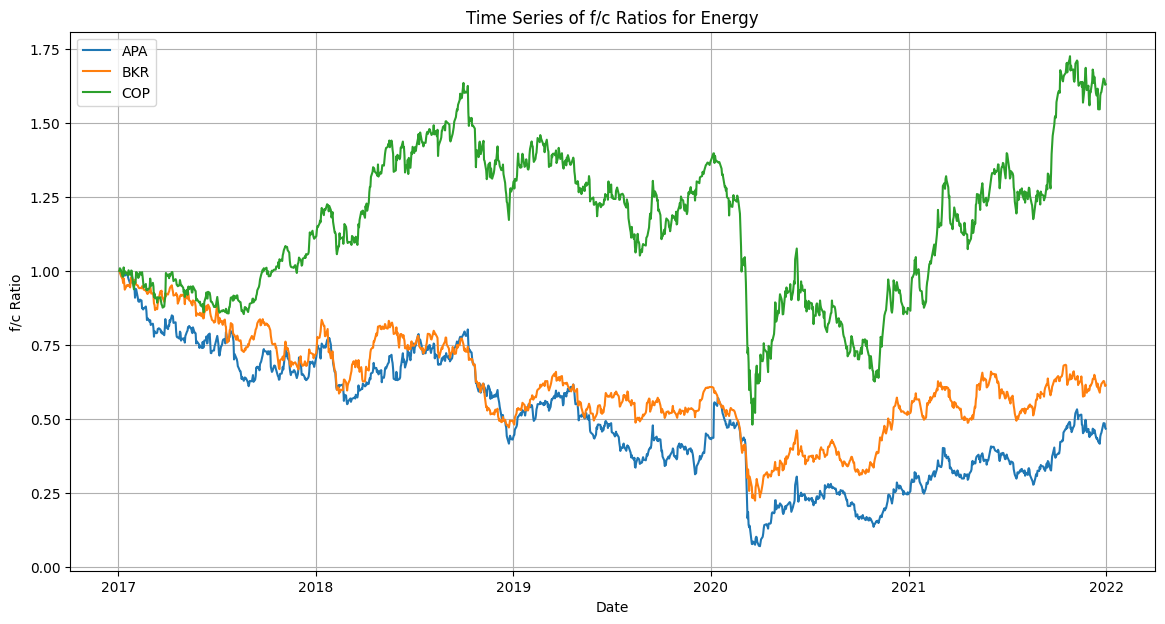

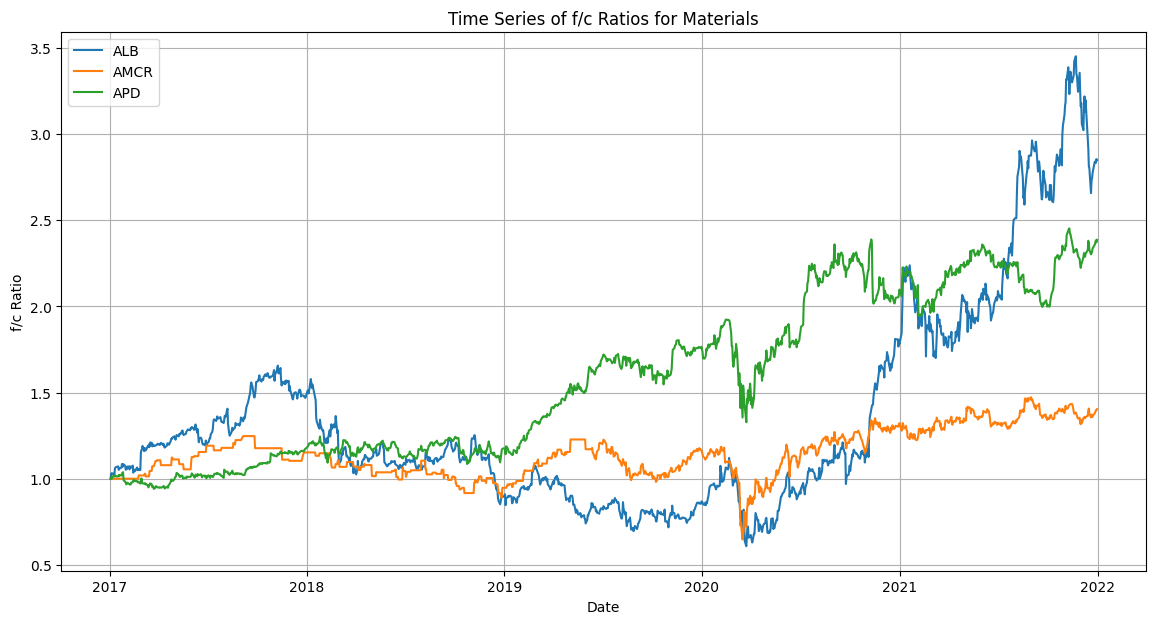

In [92]:
for sector, companies in sector_company_map.items():
    plt.figure(figsize=(14, 7))
    plt.title(f'Time Series of f/c Ratios for {sector}')

    for company in companies:
        # Filter data for the specified company within the sector
        company_data = viz_stock_data[viz_stock_data['Company'] == company]
        company_data = company_data.sort_values('Date')

        # Find the closest date to January 1, 2017
        #start_date_index = company_data['Date'].searchsorted(pd.to_datetime(start_date))[0]
        # Get the price on the first available trading day of or after January 1, 2017 as 'c'
        #c = company_data.iloc[start_date_index]['Price']

        # Get the price on the first available trading day of or after January 1, 2017 as 'c'
        if not company_data.empty:
            c = company_data.iloc[0]['Price']

            # Calculate f/c ratio
            company_data['f/c'] = company_data['Price'] / c

            # Plot
            plt.plot(company_data['Date'], company_data['f/c'], label=company)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('f/c Ratio')
    plt.grid(True)
    plt.show()


#### Information Technology (First Plot):
* Apple (AAPL) has shown a remarkable upward trajectory with some volatility, reflecting significant growth or increased valuation relative to its price at the beginning of 2017.
* Accenture (ACN) has experienced a steady rise, with fewer and smaller dips compared to Apple, indicating consistent growth.
* Adobe (ADBE) initially had a more moderate growth but then followed a similar pattern to Apple, suggesting a significant increase in its valuation or underlying financials in the latter part of the period.




#### Energy (Second Plot):
* Apache Corporation (APA) shows considerable volatility with some steep declines and recoveries, potentially mirroring the unstable oil prices and industry challenges during this period.
* Baker Hughes (BKR) and ConocoPhillips (COP) both display similar trends with significant declines, especially around 2020, likely affected by the same industry factors as APA.

#### Materials (Third Plot):
* Albemarle Corporation (ALB) shows a sharp increase starting around 2020, which might reflect a strong growth in the company's fundamentals or an increase in demand for materials it produces.
* Amcor (AMCR) and Air Products and Chemicals (APD) both show growth, with APD's f/c ratio increasing, indicating a possible expansion or higher valuation in the latter years.

### General Observations Across All Sectors:

* The IT sector appears to show the most robust growth among the three, which might be indicative of the sector's strong performance in recent years, especially with the digital transformation acceleration.
* The Energy sector's stocks exhibit high volatility, reflecting the turbulent oil and gas market conditions influenced by geopolitical events, supply-demand shifts, and global economic changes.
* The Materials sector shows a late but significant rise, particularly for ALB, which could relate to the specific materials produced and how market demand for them has evolved, especially considering the supply chain challenges and the push for electric vehicles (which require specific materials).


# 3. Optimization Model (15 pts)





In [93]:
%%capture
import sys
import os


if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'


# import modules


%matplotlib inline
from pylab import *


import shutil
import sys
import os.path
from pyomo.environ import *


executable = '/content/bin/bonmin'




### Data Prep

In [94]:
Opt_model_df=closing_prices[(closing_prices['Date'] >= '2017-01-01') & (closing_prices['Date'] <= '2021-12-31')]

In [95]:
#dataframe for selected stocks from 'return_data' dataframe in selected datestamps

selected_stocks = ['AAPL', 'ACN', 'ADBE','APA', 'BKR', 'COP','ALB', 'AMCR', 'APD']

Opt_model_df = Opt_model_df[selected_stocks]


#### Calculating Percentage change over time

In [96]:
# create a new DataFrame return_data for each ticker using pct_change as the return
return_data = pd.DataFrame()
for i in selected_stocks:
  return_data[i] = Opt_model_df[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
Opt_model_df=return_data

### <h4> <b> Average Value & Standard Deviation for Return for each of the Stocks </b> </h4>

In [97]:
# Average Value for Return for each of the Stocks
Avg_Return = pd.DataFrame(Opt_model_df.mean(), columns=["Avg_Return"])
print(Avg_Return)

# Standard Deviation for Return for each of the Stocks
Std_Dev_Return = pd.DataFrame(Opt_model_df.std(), columns=["Std_Dev_Return"])  # Use .std() to get the sample standard deviation
print(Std_Dev_Return)


      Avg_Return
AAPL    0.001673
ACN     0.001196
ADBE    0.001569
APA     0.000380
BKR    -0.000019
COP     0.000738
ALB     0.001184
AMCR    0.000423
APD     0.000823
      Std_Dev_Return
AAPL        0.019182
ACN         0.015761
ADBE        0.020803
APA         0.042845
BKR         0.027127
COP         0.026358
ALB         0.026466
AMCR        0.017504
APD         0.016197


### <h4> <b> Covariance Matrix and Dataframe to store Average Return</b> </h4>

In [98]:
# Creating Covariance Matrix from Stock Return DataFrame
df_model_cov = Opt_model_df.cov()
print('Covariance Matrix:')
print(df_model_cov)
print('\n')

# Creating a DataFrame to store the Average Value of Return for each of the stocks
df_model_return = Opt_model_df.mean()
print('Average Return:')
print(df_model_return)

Covariance Matrix:
          AAPL       ACN      ADBE       APA       BKR       COP       ALB  \
AAPL  0.000368  0.000175  0.000259  0.000228  0.000182  0.000175  0.000205   
ACN   0.000175  0.000248  0.000199  0.000249  0.000201  0.000191  0.000179   
ADBE  0.000259  0.000199  0.000433  0.000183  0.000145  0.000154  0.000186   
APA   0.000228  0.000249  0.000183  0.001836  0.000724  0.000832  0.000439   
BKR   0.000182  0.000201  0.000145  0.000724  0.000736  0.000497  0.000282   
COP   0.000175  0.000191  0.000154  0.000832  0.000497  0.000695  0.000271   
ALB   0.000205  0.000179  0.000186  0.000439  0.000282  0.000271  0.000700   
AMCR  0.000102  0.000124  0.000096  0.000247  0.000181  0.000193  0.000151   
APD   0.000152  0.000154  0.000153  0.000233  0.000187  0.000197  0.000211   

          AMCR       APD  
AAPL  0.000102  0.000152  
ACN   0.000124  0.000154  
ADBE  0.000096  0.000153  
APA   0.000247  0.000233  
BKR   0.000181  0.000187  
COP   0.000193  0.000197  
ALB   0.000

## Defining Model and Declaring Variables  

In [99]:
# Defining Model

m = ConcreteModel()

# Define variables
m.AAPL = Var(within=NonNegativeReals, bounds=(0, 1))
m.ACN = Var(within=NonNegativeReals, bounds=(0, 1))
m.ADBE = Var(within=NonNegativeReals, bounds=(0, 1))
m.APA = Var(within=NonNegativeReals, bounds=(0, 1))
m.BKR = Var(within=NonNegativeReals, bounds=(0, 1))
m.COP = Var(within=NonNegativeReals, bounds=(0, 1))
m.ALB = Var(within=NonNegativeReals, bounds=(0, 1))
m.AMCR = Var(within=NonNegativeReals, bounds=(0, 1))
m.APD = Var(within=NonNegativeReals, bounds=(0, 1))

# Define binary variables
m.b_AAPL = Var(within=Binary, bounds=(0, 1))
m.b_ACN = Var(within=Binary, bounds=(0, 1))
m.b_ADBE = Var(within=Binary, bounds=(0, 1))
m.b_APA = Var(within=Binary, bounds=(0, 1))
m.b_BKR = Var(within=Binary, bounds=(0, 1))
m.b_COP = Var(within=Binary, bounds=(0, 1))
m.b_ALB = Var(within=Binary, bounds=(0, 1))
m.b_AMCR = Var(within=Binary, bounds=(0, 1))
m.b_APD = Var(within=Binary, bounds=(0, 1))

#using the below variables to optimize the objective function
sectors = {
    'IT': ['AAPL', 'ACN', 'ADBE'],
    'Energy': ['APA', 'BKR', 'COP'],
    'Materials': ['ALB', 'AMCR', 'APD']
}

variables = [m.AAPL , m.ACN	, m.ADBE , m.APA ,	m.BKR	, m.COP , m.ALB , m.AMCR	, m.APD]
bin_variables=[m.b_AAPL, m.b_ACN, m.b_ADBE,m.b_APA, m.b_BKR, m.b_COP,m.b_ALB, m.b_AMCR, m.b_APD]

# Defining Objective function to maximize Return

expr = sum(v * bin_var * return_val for v, bin_var, return_val in zip(variables, bin_variables, df_model_return))
m.objective = Objective(expr=expr, sense=maximize)





<ipython-input-99-cc4a76896157>:39: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  expr = sum(v * bin_var * return_val for v, bin_var, return_val in zip(variables, bin_variables, df_model_return))


## Declaring constraints

In [100]:
# Constraint 1: Sum of all proportions = 1
if 'sum_proportions' in m.component_map(Constraint):
    m.del_component(m.sum_proportions)
m.sum_proportions = Constraint(expr=sum(variables) == 1)

# Constraints 2: Minimum allocation of 2% for each stock else allocating value of stocks to zero
for stock, v, bin_var in zip(selected_stocks, variables, bin_variables):
    #Minimum allocation of 2% if selected
    m.add_component(f"min_allocation_{stock}", Constraint(expr=v >= 0.02 * bin_var)) #example m.min_allocation_AAPL
    #zero allocation if not selected
    m.add_component(f"zero_allocation_{stock}", Constraint(expr=v <= bin_var)) #example m.max_allocation_AAPL

# Constraints 3: Choose at least 1 Stock Per Sector
for sector, stocks in sectors.items():
    expr = sum(getattr(m, f"b_{stock}") for stock in stocks) >= 1
    m.add_component(f"proportion_{sector}", Constraint(expr=expr)) #m.proportion_IT

# Additional Technical Constraint
if 'total_risk' in m.component_map(Constraint):
    m.del_component(m.total_risk)
m.total_risk = Constraint(expr=sum(variables) >= 0.0)

<ipython-input-100-6503b35aa5da>:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  expr = sum(getattr(m, f"b_{stock}") for stock in stocks) >= 1


In [101]:
# Activate all constraints if not already activated
for con in m.component_objects(Constraint, active=None):
    con.activate()


In [102]:
m.pprint() #verifying that my constraints are declared

18 Var Declarations
    AAPL : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    ACN : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    ADBE : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    ALB : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    AMCR : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    APA : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals

<h1> <b> Constructing tables to compute the risk </b> </h1>

In [103]:
# Risk Calculation

def calc_risk(m):
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_model_cov.at[selected_stocks[i],selected_stocks[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)




## <h1> <b> Keeping Max Risk & Risk Ceilings </b> </h1>

In [104]:
# Range of Risk Limits
max_risk = 0.0005

# Sequence of risk levels
risk_limits = np.arange(0.00001, max_risk, 0.000002) # take very tiny steps
risk_limits



array([1.00e-05, 1.20e-05, 1.40e-05, 1.60e-05, 1.80e-05, 2.00e-05,
       2.20e-05, 2.40e-05, 2.60e-05, 2.80e-05, 3.00e-05, 3.20e-05,
       3.40e-05, 3.60e-05, 3.80e-05, 4.00e-05, 4.20e-05, 4.40e-05,
       4.60e-05, 4.80e-05, 5.00e-05, 5.20e-05, 5.40e-05, 5.60e-05,
       5.80e-05, 6.00e-05, 6.20e-05, 6.40e-05, 6.60e-05, 6.80e-05,
       7.00e-05, 7.20e-05, 7.40e-05, 7.60e-05, 7.80e-05, 8.00e-05,
       8.20e-05, 8.40e-05, 8.60e-05, 8.80e-05, 9.00e-05, 9.20e-05,
       9.40e-05, 9.60e-05, 9.80e-05, 1.00e-04, 1.02e-04, 1.04e-04,
       1.06e-04, 1.08e-04, 1.10e-04, 1.12e-04, 1.14e-04, 1.16e-04,
       1.18e-04, 1.20e-04, 1.22e-04, 1.24e-04, 1.26e-04, 1.28e-04,
       1.30e-04, 1.32e-04, 1.34e-04, 1.36e-04, 1.38e-04, 1.40e-04,
       1.42e-04, 1.44e-04, 1.46e-04, 1.48e-04, 1.50e-04, 1.52e-04,
       1.54e-04, 1.56e-04, 1.58e-04, 1.60e-04, 1.62e-04, 1.64e-04,
       1.66e-04, 1.68e-04, 1.70e-04, 1.72e-04, 1.74e-04, 1.76e-04,
       1.78e-04, 1.80e-04, 1.82e-04, 1.84e-04, 1.86e-04, 1.88e

In [105]:
# Displaying the total count of distinct risk ceiling values used
print('total number of risk ceilings used:', len(risk_limits)) #You should consider at least 100 risk levels

total number of risk ceilings used: 245


<h1> <b> Model Output </b> </h1>

In [106]:

# Initialize dictionaries to store results
parameter_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
infeasible_risks = []  # store infeasible risk values

# Solver setup for Bonmin
bonmin_executable = os.environ['PATH'] # Update the path to BonMin

for r in risk_limits:
   # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
   m.del_component(m.total_risk)
   # The LHS remains unchanged; we only modify the RHS (risk threshold)
   m.total_risk = Constraint(expr=expr_risk <= r)

   # Solve the model using the Bonmin solver
   result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m, tee= True)
    # If the result is infeasible, store the risk value and skip to the next iteration
   if result.solver.termination_condition == TerminationCondition.infeasible:
        infeasible_risks.append(r)
        continue
    # The result object doesn't have a 'write' method; if you're trying to save the results, handle it appropriately here.
   result = result.write()

   parameter_analysis[r] = [m.AAPL(), m.ACN(), m.ADBE(), m.APA(), m.BKR(), m.COP(), m.ALB(), m.AMCR(), m.APD()]
  # store our returns
   returns[r] =  m.AAPL()*df_model_return[0] + m.ACN()*df_model_return[1] + m.ADBE()*df_model_return[2] + m.APA()*df_model_return[3] + m.BKR()*df_model_return[4] + m.COP()*df_model_return[5] + m.ALB()*df_model_return[6] + m.AMCR()*df_model_return[7] +  m.APD()*df_model_return[8]

# After running the loop, check for at least one discarded risk level
if not infeasible_risks:
    raise ValueError("At least one risk level should lead to an infeasible problem.")

# Print infeasible risks
print("Infeasible Risks:", infeasible_risks)



Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Streaming output truncated to the last 5000 lines.
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Bonmin 1.8.8 using Cbc 2.10.10 and Ipopt 3.13.2
bonmin: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All 

<h1> <b> Risk Levels leading to Infeasible Problem </b> </h1>

In [107]:
print("Infeasible Risk Values:", infeasible_risks)

Infeasible Risk Values: [1e-05, 1.2e-05, 1.4e-05, 1.6e-05, 1.7999999999999997e-05, 1.9999999999999998e-05, 2.2e-05, 2.3999999999999997e-05, 2.5999999999999995e-05, 2.7999999999999996e-05, 2.9999999999999997e-05, 3.199999999999999e-05, 3.399999999999999e-05, 3.5999999999999994e-05, 3.7999999999999995e-05, 3.999999999999999e-05, 4.199999999999999e-05, 4.399999999999999e-05, 4.599999999999999e-05, 4.799999999999999e-05, 4.999999999999999e-05, 5.199999999999999e-05, 5.3999999999999984e-05, 5.5999999999999986e-05, 5.799999999999999e-05, 5.999999999999999e-05, 6.199999999999999e-05, 6.399999999999998e-05, 6.599999999999999e-05, 6.799999999999999e-05, 6.999999999999998e-05, 7.199999999999999e-05, 7.399999999999998e-05, 7.599999999999998e-05, 7.799999999999999e-05, 7.999999999999998e-05, 8.199999999999999e-05, 8.399999999999998e-05, 8.599999999999998e-05, 8.799999999999998e-05, 8.999999999999998e-05, 9.199999999999997e-05, 9.399999999999998e-05, 9.599999999999998e-05, 9.799999999999997e-05, 9.

In [108]:
len(infeasible_risks)

83

In [109]:
print(parameter_analysis)

{0.00017599999999999997: [0.15418675951024982, 0.2683051204270075, 0.0609037448546174, 0.0, 1.0952895678023426e-10, 0.019999995650479087, 1.0041760757314573e-09, 0.2556313042886411, 0.24097308168281764], 0.00017799999999999996: [0.1717513625786441, 0.2750700756901752, 0.06701318984765471, 0.0, 0.0, 0.01999999830527091, 0.020000005348984475, 0.23062479253199306, 0.21554058063643924], 0.00017999999999999996: [0.19295877986754278, 0.2848949116044192, 0.07304688133775702, 0.0, 0.0, 0.020000000951061907, 0.02000001313065677, 0.20883846393257482, 0.20026095698360794], 0.00018199999999999995: [0.2095567559595877, 0.29258144078268267, 0.07777395026910322, 3.4115799114698087e-09, 3.4213217759830525e-09, 0.020001269102555373, 0.020003008397932866, 0.1917845659299253, 0.18829900272531136], 0.00018399999999999995: [0.22367162513811267, 0.29912142187581153, 0.08178799782599783, 3.1635720437582025e-09, 3.179045229457501e-09, 0.020000829447803795, 0.020002177356769884, 0.177285349415039, 0.1781305925

# <h1> <b> Proportions of the Portfolio for each risk limit </b> </h1>



## Chosing Portfolio that has atleast 3 stocks more than 10%

In [110]:
pip install iteround

In [111]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(parameter_analysis,orient ='index', columns=selected_stocks)

In [112]:
param_analysis.head()

,AAPL,ACN,ADBE,APA,BKR,COP,ALB,AMCR,APD
0.000176,0.154187,0.268305,0.060904,0.000000e+00,1.095290e-10,0.020000,1.004176e-09,0.255631,0.240973
0.000178,0.171751,0.275070,0.067013,0.000000e+00,0.000000e+00,0.020000,2.000001e-02,0.230625,0.215541
0.000180,0.192959,0.284895,0.073047,0.000000e+00,0.000000e+00,0.020000,2.000001e-02,0.208838,0.200261
0.000182,0.209557,0.292581,0.077774,3.411580e-09,3.421322e-09,0.020001,2.000301e-02,0.191785,0.188299
0.000184,0.223672,0.299121,0.081788,3.163572e-09,3.179045e-09,0.020001,2.000218e-02,0.177285,0.178131


In [113]:
#calculating best risk
#each stock must have at least 10% allocation
#determine the "best risk" level for a portfolio based on above constraint
best_risk = 0
for ri, row in param_analysis.iterrows():
  #check whether at least three stocks have an allocation greater than 11% at the current risk level.
    if (row > 0.11).sum() >= 3:
        best_risk = max(best_risk, ri)


print(best_risk)

0.00028399999999999996


## PORTFOLIO

In [114]:


from iteround import saferound
closest_index = param_analysis.index.get_indexer([best_risk], method='nearest')
best_risk_index = param_analysis.iloc[closest_index].index
portfolio = param_analysis.iloc[closest_index]
portfolio = np.round(portfolio, 5)
portfolio = portfolio.loc[:, (portfolio > 0).all()]
portfolio

,AAPL,ACN,ADBE,COP,ALB,APD
0.000284,0.60987,0.11091,0.21913,0.02001,0.02006,0.02002


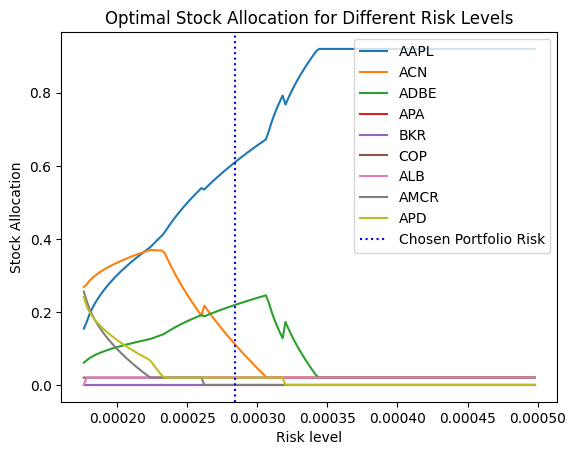

In [115]:
# Visualizing optimal stock allocations across various risk levels
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.axvline(x=best_risk_index, color='b', linestyle='dotted', label='Chosen Portfolio Risk')  # Highlighting chosen risk level
plt.legend(loc='upper right')  # Positioning the legend
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
plt.show()  # Displaying the plot


In [116]:
# Extracting risk and reward data from returns dictionary
risk = list(returns.keys())  # Converting dictionary keys (risk values) to a list
print(risk)
reward = list(returns.values())  # Converting dictionary values (reward values) to a list
print(reward)  # Using 'reward' instead of 'return' as the latter is a reserved keyword in Python

[0.00017599999999999997, 0.00017799999999999996, 0.00017999999999999996, 0.00018199999999999995, 0.00018399999999999995, 0.00018599999999999994, 0.00018799999999999996, 0.00018999999999999996, 0.00019199999999999995, 0.00019399999999999995, 0.00019599999999999994, 0.00019799999999999996, 0.00019999999999999996, 0.00020199999999999995, 0.00020399999999999994, 0.00020599999999999994, 0.00020799999999999996, 0.00020999999999999995, 0.00021199999999999995, 0.00021399999999999994, 0.00021599999999999994, 0.00021799999999999996, 0.00021999999999999995, 0.00022199999999999995, 0.00022399999999999994, 0.00022599999999999994, 0.00022799999999999993, 0.00022999999999999995, 0.00023199999999999995, 0.00023399999999999994, 0.00023599999999999994, 0.00023799999999999993, 0.00023999999999999995, 0.00024199999999999995, 0.00024399999999999994, 0.00024599999999999996, 0.00024799999999999996, 0.00024999999999999995, 0.00025199999999999995, 0.00025399999999999994, 0.000256, 0.000258, 0.00026, 0.00026199

## Graphing  Efficient Frontier

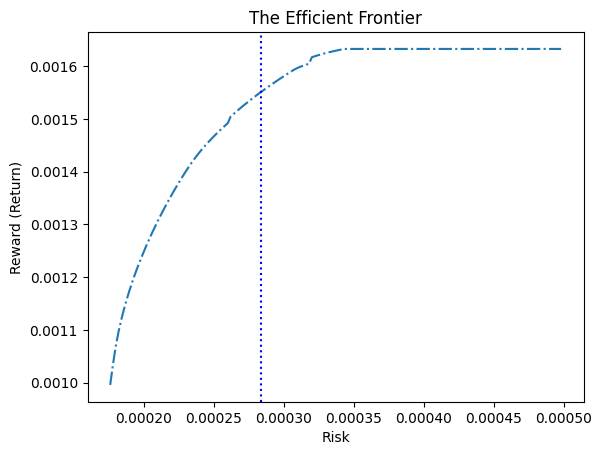

In [117]:
# Plot Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.axvline(x= best_risk_index, color='b', linestyle='dotted', label='Chosen Portfolio Risk')  # Marking the chosen risk level
plt.show()  # Displaying the plot

In [118]:
#creating dataframe of different levels of risk computed during the portfolio optimization process.
risk_series = pd.Series(param_analysis.index)

#find the risk level closest to the optimal risk.
closest_index = (risk_series - best_risk_index).abs().idxmin()

# Now you can access the row in param_analysis using iloc
closest_values = param_analysis.iloc[closest_index]

def saferound(value, places):
    """
    Rounds a number to a given precision in decimal digits, avoiding issues with floating-point representation.

    :param value: The number to round.
    :param places: The number of decimal places to round to.
    :return: The rounded number as a float.
    """
    format_string = '{0:.' + str(places) + 'f}'
    return float(format_string.format(value))

# Assuming closest_values is a pandas Series with numerical values
rounded_values = closest_values.apply(lambda x: saferound(x, places=2))

# Create a new Series with the rounded values
portfolio = pd.Series(rounded_values, index=closest_values.index)

print(portfolio)



AAPL    0.61
ACN     0.11
ADBE    0.22
APA     0.00
BKR     0.00
COP     0.02
ALB     0.02
AMCR    0.00
APD     0.02
Name: 0.00028399999999999996, dtype: float64


# 4. Buy-and-hold Strategy (20 pts)


## Buy-and-Hold strategy for the MPT portfolio

### Define Portfolio Weights and Retrieve Stock Data:

In [119]:
# Define the MPT portfolio weights
weights = {'AAPL': 0.61, 'ACN': 0.11, 'ADBE': 0.22, 'COP': 0.02, 'ALB': 0.02, 'APD' :  0.02}

# List of portfolio tickers
p_tickers = list(weights.keys())



In [120]:
# Define function to retrieve stock prices for 2022
def get_stock_prices(tickers, start_date, end_date):
    prices = {}
    for ticker in tickers:
        prices[ticker] = si.get_data(ticker, start_date=start_date, end_date=end_date)['adjclose']
    return prices

In [121]:
prices = get_stock_prices(p_tickers, '2022-01-01', '2022-12-31') #fetching data for mpt buy hold strategy
sp500_prices = get_stock_prices(['^GSPC'], '2022-01-01', '2022-12-31') #fetching data for s&p500 buy and hold strategy

In [122]:
# Aggregating adjusted close prices from each ticker in the portfolio
portfolio_data = pd.DataFrame()
for i in p_tickers:
    portfolio_data[i] = prices[i]

### a) Amount of Money Invested in Each Stock of Your Portfolio

In [123]:
# Calculate initial investments based on MPT allocations
initial_investment = 100000
# Calculate the amount of money invested in each stock
amount_invested = {ticker: initial_investment * allocation for ticker, allocation in weights.items()}
print('Amount Invested:\n',amount_invested)

Amount Invested:
 {'AAPL': 61000.0, 'ACN': 11000.0, 'ADBE': 22000.0, 'COP': 2000.0, 'ALB': 2000.0, 'APD': 2000.0}


### b) Aggregate Value of the Entire Portfolio

In [124]:
# Calculate the number of shares for each stock based on the first day's closing prices
number_of_shares = {ticker: amount_invested[ticker] / prices[ticker].iloc[0] for ticker in p_tickers}
print('Number od Shares:\n',number_of_shares)
# Aggregate value of the portfolio over time
investment_values = pd.DataFrame({ticker: prices[ticker] * number_of_shares[ticker] for ticker in p_tickers})
portfolio_value_over_time = investment_values.sum(axis=1)
#converting to data frame
pd.DataFrame(list(portfolio_value_over_time.items()), columns=['Date', 'Portfolio Value'])

Number od Shares:
 {'AAPL': 339.40825215315215, 'ACN': 28.026321017415913, 'ADBE': 38.98151955337713, 'COP': 29.7311793017714, 'ALB': 8.607131642122674, 'APD': 7.160499600434158}


,Date,Portfolio Value
0,2022-01-03,100000.000000
1,2022-01-04,98904.063067
2,2022-01-05,95505.399042
3,2022-01-06,94012.420693
4,2022-01-07,93816.708061
...,...,...
246,2022-12-23,72344.019553
247,2022-12-27,71507.457792
248,2022-12-28,69730.325042
249,2022-12-29,71510.485843


### c) Percentual Return of Each Stock

In [125]:
# Monthly returns for each stock
monthly_returns_stocks = investment_values.pct_change().resample('M').last()
monthly_returns_stocks

,AAPL,ACN,ADBE,COP,ALB,APD
2022-01-31,0.026126,0.031296,0.031149,-0.006725,0.070358,0.016173
2022-02-28,0.001638,-0.020123,0.004597,0.039334,0.020526,-0.016973
2022-03-31,-0.017776,-0.003634,-0.009651,-0.010880,-0.008963,-0.006480
2022-04-30,-0.036605,-0.042952,-0.035515,-0.020810,-0.012445,-0.026655
2022-05-31,-0.005346,-0.018708,-0.027416,-0.019546,-0.038757,-0.017913
2022-06-30,-0.018028,-0.007720,-0.006621,-0.018041,-0.013734,-0.004265
2022-07-31,0.032793,0.008496,0.016406,0.035828,0.033810,0.016378
2022-08-31,-0.010635,-0.013812,-0.004346,-0.009502,-0.017634,-0.013289
2022-09-30,-0.030039,-0.003756,-0.010961,-0.012734,-0.003768,0.011254
2022-10-31,-0.015410,-0.013483,-0.022046,-0.008493,-0.001035,-0.015878


### d) Percentual Return of the Entire Portfolio

In [126]:
# Monthly return of the entire portfolio
monthly_portfolio_returns = portfolio_value_over_time.pct_change().resample('M').last()
pd.DataFrame(list(monthly_portfolio_returns.items()), columns=['Date', 'monthly_portfolio_returns'])

,Date,monthly_portfolio_returns
0,2022-01-31,0.027512
1,2022-02-28,0.001158
2,2022-03-31,-0.014228
3,2022-04-30,-0.035883
4,2022-05-31,-0.012890
5,2022-06-30,-0.014380
6,2022-07-31,0.027065
7,2022-08-31,-0.010043
8,2022-09-30,-0.022225
9,2022-10-31,-0.015545


## Buy-and-Hold Strategy for the S&P 500 Index (^GSPC)

### a) Aggregate Value of Your Investment

In [127]:
import yfinance as yf


In [128]:
# Retrieve S&P 500 data
sp500_data = yf.download('^GSPC', start='2022-01-01', end='2022-12-31')['Adj Close']

# S&P 500 investment value over time
sp500_shares = initial_investment / sp500_data.iloc[0]
sp500_value_over_time = sp500_data * sp500_shares
sp500_value_over_time
pd.DataFrame(list(sp500_value_over_time.items()), columns=['Date', 'sp500_value'])

[*********************100%%**********************]  1 of 1 completed


,Date,sp500_value
0,2022-01-03,100000.000000
1,2022-01-04,99937.037804
2,2022-01-05,97998.983036
3,2022-01-06,97904.534652
4,2022-01-07,97508.000067
...,...,...
246,2022-12-23,80157.863581
247,2022-12-27,79833.254525
248,2022-12-28,78873.607846
249,2022-12-29,80250.846070


b) Percentual Return on the Last Day of Each Month

In [129]:
# Monthly returns for S&P 500
sp500_monthly_returns = sp500_value_over_time.pct_change().resample('M').last()
pd.DataFrame(list(sp500_monthly_returns.items()), columns=['Date', 'sp500_monthly_returns'])

,Date,sp500_monthly_returns
0,2022-01-31,0.018886
1,2022-02-28,-0.002443
2,2022-03-31,-0.015653
3,2022-04-30,-0.036285
4,2022-05-31,-0.006274
5,2022-06-30,-0.008759
6,2022-07-31,0.014208
7,2022-08-31,-0.007817
8,2022-09-30,-0.015067
9,2022-10-31,-0.007454


## Performance Comparison Plot

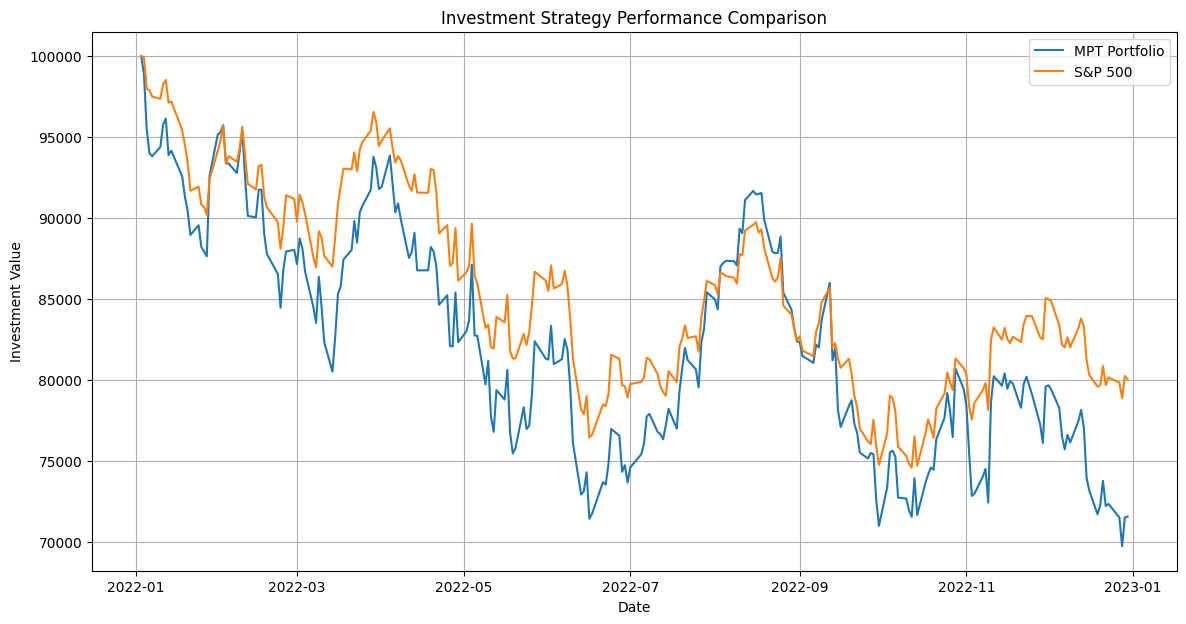

In [130]:
# Plot the performance comparison
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_over_time.index, portfolio_value_over_time, label='MPT Portfolio')
plt.plot(sp500_value_over_time.index, sp500_value_over_time, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.title('Investment Strategy Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Create and Display the Tables for MPT and S&P 500 Buy-and-Hold Strategy

In [131]:
# Define the buy-and-hold strategy function
def buy_and_hold_strategy(prices, allocations, initial_investment):
    # Calculate the amount invested in each stock
    amounts = {ticker: initial_investment * allocation for ticker, allocation in allocations.items()}
    # Calculate the aggregate value over time
    portfolio_values = pd.DataFrame(index=prices[list(prices.keys())[0]].index)
    for ticker, amount in amounts.items():
        portfolio_values[ticker] = prices[ticker] / prices[ticker][0] * amount
    portfolio_values['Total'] = portfolio_values.sum(axis=1)
    return portfolio_values

In [132]:
# Concatenate the 'Total' columns from both strategies
mpt_buy_and_hold_values = buy_and_hold_strategy(prices, weights, initial_investment)
SP500_buy_and_hold_values= buy_and_hold_strategy({'^GSPC': sp500_prices['^GSPC']}, {'^GSPC': 1}, initial_investment)


In [133]:
df_table = pd.concat([mpt_buy_and_hold_values['Total'], SP500_buy_and_hold_values['Total']], axis=1).resample('M').last()

df_table.columns = ['Buy & hold - MPT', 'Buy & hold - S&P500']

pd.DataFrame(df_table)


,Buy & hold - MPT,Buy & hold - S&P500
2022-01-31,95156.190132,94141.421134
2022-02-28,88037.314176,91189.099854
2022-03-31,91794.645658,94451.233820
2022-04-30,82332.925768,86143.613867
2022-05-31,81327.216568,86148.194787
2022-06-30,73662.949763,78918.638286
2022-07-31,85417.921196,86109.419847
2022-08-31,82374.080970,82454.925023
2022-09-30,70986.719827,74753.991890
2022-10-31,79451.692436,80724.100880


# 5. MONTE CARLO SIMULATION (20 pts)


## Fetch 2022 data

In [134]:
monte_carlo_data = Model_stock_data[(Model_stock_data['Date'] >= '2022-01-01') & (Model_stock_data['Date'] <= '2022-12-31')]


## Simulate the Annual Performance 1000 times

In [135]:
# Step 1: Simulate the annual performance of the model 1000 times
num_simulations = 1000

# Step 2: Sample the daily return of each stock 252 times
num_trading_days = 252

# Step 3: Assume that the daily return of each stock follows a normal distribution
# Step 4: Sample 252 values from a normal distribution for each stock and each simulation
monte_carlo_data = pd.DataFrame()
for stock in weights.keys():
    avg_return = Avg_Return.loc[stock, 'Avg_Return']
    std_dev_return = Std_Dev_Return.loc[stock, 'Std_Dev_Return']
    daily_returns = np.random.normal(avg_return, std_dev_return, size=(num_simulations, num_trading_days))
    monte_carlo_data[stock] = np.prod(1 + daily_returns, axis=1) - 1

# Step 5: Calculate the performance of each stock and the entire portfolio
portfolio_performance = monte_carlo_data.dot(list(weights.values()))
stock_performance = monte_carlo_data.mul(list(weights.values()), axis=1)



## Density plot of expected return of the Portfolio

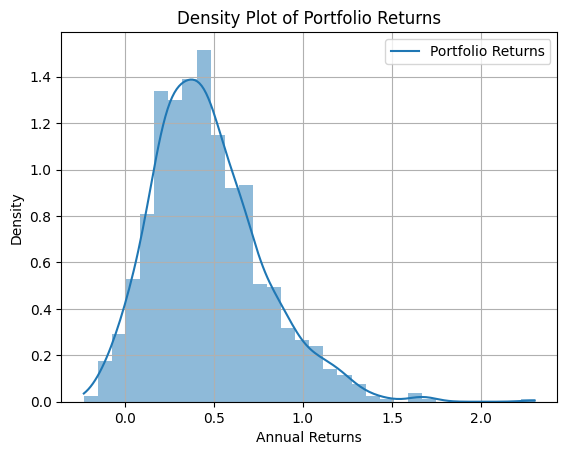

In [136]:

# Step 6: Create a density plot showing the expected return of the portfolio
sns.histplot(portfolio_performance, kde=True, stat="density", linewidth=0)
plt.title('Density Plot of Portfolio Returns')
plt.xlabel('Annual Returns')
plt.ylabel('Density')
plt.legend(['Portfolio Returns'])
plt.grid(True)

# Step 7: Report the probability that each stock in the portfolio will lose money
probabilities_of_loss = (stock_performance < 0).mean()

# Step 8: Report the probability that the portfolio will lose money
portfolio_loss_probability = (portfolio_performance < 0).mean()



## Results

In [137]:
# Step 10: Present the results in a text block
print("Monte Carlo Analysis Results:")
print("\nProbability of Losing Money (Each Stock):")
pd.DataFrame(probabilities_of_loss, columns=[ 'Probabilty_of_losing_money'])


Monte Carlo Analysis Results:

Probability of Losing Money (Each Stock):


,Probabilty_of_losing_money
AAPL,0.113
ACN,0.135
ADBE,0.153
COP,0.390
ALB,0.285
APD,0.227


In [138]:
print("\nProbability of Losing Money (Portfolio):")
print(portfolio_loss_probability)


Probability of Losing Money (Portfolio):
0.037


Probability of Losing Money (Each Stock):
* AAPL   : 0.099 --> 11.3%
* ACN    : 0.130 --> 13.5%
* ADBE   : 0.130 --> 15.3%
* COP    : 0.432 --> 39%
* ALB    : 0.295 --> 28.5%
* APD    : 0.280 --> 22.7%


Probability of Losing Money (Portfolio):
0.037= 3.7%

# 6. Conclusion (5 pts)


* Growth Trajectory: Information Technology stocks have shown significant growth, with AAPL leading, indicating a strong market confidence in tech compared to Energy and Materials sectors.
* Market Volatility: IT stocks exhibit higher volatility, seen in the steeper climbs and drops in their f/c ratios, signaling potential for higher returns but with greater risk.
* Diversification and Concentration Risk: Heavy allocation to AAPL suggests reliance on its performance; however, this also introduces concentration risk, where the portfolio may be overly dependent on a single stock’s fortunes.
* Efficiency of Portfolio: The chosen portfolio risk aligns closely with the Efficient Frontier, suggesting an optimized balance between risk and expected return.
* Risk of Loss: Despite their robust performance, all stocks show a probability of loss, with Energy sector stocks like COP showing the highest probability, reminding investors that no stock is without risk.
* Relative Performance: The MPT portfolio fluctuates around the S&P 500 benchmark, demonstrating periods of both outperformance (during bull market) and underperformance (During Bear Market), indicating the impact of stock selection and timing on returns.
* External Impact on Sectors: The Energy sector’s f/c ratio downturn around 2020 could reflect external shocks, such as economic impacts from global events, affecting sector-specific risks.
* Expected Return Distribution: The density plot shows a bell-shaped distribution skewed toward positive returns, suggesting that the portfolio is more likely to yield positive annual returns.